### Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

### Completing.

We may want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

## Correcting.

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.


## Creating.

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.


## Classifying.

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived.




이 부분의 참조 문헌 : 

https://www.kaggle.com/startupsci/titanic-data-science-solutions

### 추가할만한 내용 from comments : 
1) This would also explain why many passengers with the same surname had the same ticket id and why there is a correlation between the number of people with the same ticket and the fare. For this reason it might be better to divide the fare value by the number of people with the same ticket.

Reference of the whole page : https://www.kaggle.com/mviola/titanic-eda-simple-model-0-80622/comments#Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
PATH_train='../Data/Titanic/train.csv'
PATH_test='../Data/Titanic/test.csv'

In [3]:
titanic_train=pd.read_csv(PATH_train)
titanic_test=pd.read_csv(PATH_test)

In [4]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Test set is missing the value of 'Survived' which is the target

In [5]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_test.shape

(418, 11)

In [8]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Uniqueness of the features

train에 사용되는 모델 수가 891인데 target을 제외하고 
Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
인 것으로 보아 those should be of categorical types except 'Survived' which is the target

In [9]:
titanic_train.nunique().sort_values(ascending=True)

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

### Missing value analysis

In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

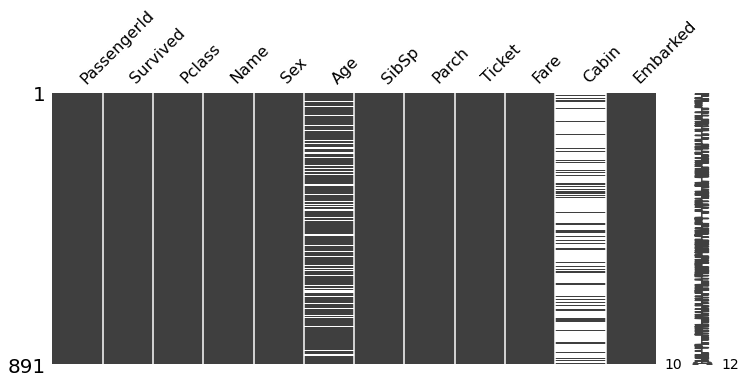

In [11]:
msno.matrix(titanic_train,figsize=(12,5))

In [12]:
# nanList=['Age', 'Cabin', 'Embarked']
# for nan in nanList :
#     titanic_train[nan].dropna(axis=0, inplace=True)
#     print(np.sum(titanic_train[nan].isna()))

### Type Change

확인해 보니 여기서는 categorical type이 아닌 경우 더 편하게 데이터를 다룰 수 있는 것 같다.

In [13]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# categoryVariableList = ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']
# for var in categoryVariableList:
#     titanic_train[var] = titanic_train[var].astype("category")

In [15]:
# typesCountSerie = titanic_train.dtypes.value_counts()

# # format columns as arrays of either strings or integers
# # typeNames are easier to sort as array of `string` rather than an array of `dtype`
# typeNamesColumn = list(map(lambda t: t.name , typesCountSerie.index.values));
# typeCountColumn = typesCountSerie.values

# # create an initial dataframe, with multiple occurences of the same "variableType"
# intialDataTypeDf = pd.DataFrame({
#     "variableType": typeNamesColumn, 
#     "count": typeCountColumn
# })

# # Group initial data frame by "variableType", 
# # then reset_index to have a proper dataframe
# groupedDataTypeDf = intialDataTypeDf.groupby(['variableType']).sum().reset_index()

# # Plot as expect
# fig,ax = plt.subplots()
# fig.set_size_inches(12,5)
# sns.barplot(data=groupedDataTypeDf, x="variableType",y="count", ax=ax)

# Value Analysis

In [16]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Values that seems important to me
* Pclass ~ Sex > Fare> Embarked> Cabin > Age> SibSp > Parch
* money-related values : Pclass, Fare, Cabin, Embarked(connection between class and where you live)
* sex-related : Sex, SibSp
* Age-related : Age, Parch

# Survived

In [17]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Count on Survived')

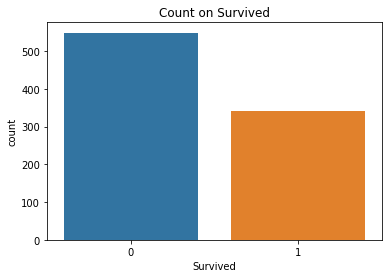

In [18]:
sns.countplot(x=titanic_train['Survived']).set_title('Count on Survived')

Survived count is less compared to dead

# Pclass

* The number of passengers is outstandingly large in Pclass 3

In [19]:
titanic_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [20]:
titanic_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Count on Pclass')

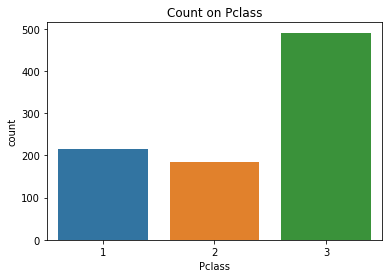

In [21]:
sns.countplot(x=titanic_train['Pclass']).set_title('Count on Pclass')

* Survival rate increases according to the level of Pclass
* It doesn't have any specific relation between embarked and Pclass but as Pclass level increases, number of Embarked site 'S' increases

[Text(0.5, 1.0, 'Embarked location on Pclass'),
 Text(0.5, 0, 'Embarked'),
 Text(0, 0.5, 'Pclass')]

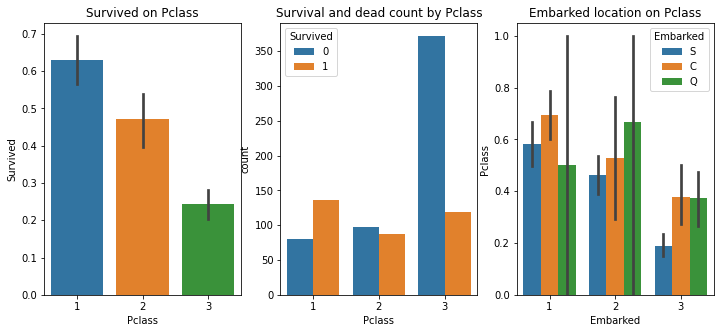

In [22]:
fig, ax=plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.barplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', y='Survived', ax=ax[0])
ax[0].set(title='Survived on Pclass', xlabel='Pclass', ylabel='Survived')

sns.countplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', hue='Survived', ax=ax[1])
ax[1].set(title='Survival and dead count by Pclass', xlabel='Pclass', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Pclass', y='Survived', hue='Embarked', ax=ax[2])
ax[2].set(title='Embarked location on Pclass', xlabel='Embarked', ylabel='Pclass')

In [23]:
titanic_train.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### Survival rate according to sex and pclass

In [24]:
class_sex_df=titanic_train.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

class_sex_df

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


The rate of survival increases on female, but it dramatically dreases when it comes to Pclass 3

[Text(0.5, 1.0, 'Survival rate according to sex and pclass'),
 Text(0.5, 0, 'Pclass'),
 Text(0, 0.5, 'Survived')]

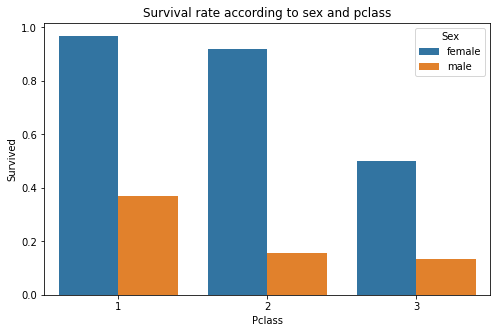

In [25]:
fig, ax=plt.subplots()
fig.set_size_inches(8, 5)

sns.barplot(data=class_sex_df, x='Pclass', y='Survived', hue='Sex', ax=ax)
ax.set(title='Survival rate according to sex and pclass', xlabel='Pclass', ylabel='Survived')

# Fare

* As the fare increases, the rate of survival increases
* As Pclass level increases, both of fare and the survival rate increase

In [26]:
titanic_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

It is weird that we have min value of 0 because not any fare would be of 0. So, let's see how many of the values would be of zero's

In [27]:
zero_cond=titanic_train['Fare']==0
titanic_train[zero_cond].groupby('Pclass').describe()

PassengerId                                                        \
             count        mean         std    min     25%    50%     75%   
Pclass                                                                     
1              5.0  668.800000  239.592780  264.0  634.00  807.0  816.00   
2              6.0  508.166667  168.882701  278.0  427.25  474.5  626.75   
3              4.0  338.250000  180.872653  180.0  249.00  287.5  376.75   

              Survived        ... Parch       Fare                           \
          max    count  mean  ...   75%  max count mean  std  min  25%  50%   
Pclass                        ...                                             
1       823.0      5.0  0.00  ...   0.0  0.0   5.0  0.0  0.0  0.0  0.0  0.0   
2       733.0      6.0  0.00  ...   0.0  0.0   6.0  0.0  0.0  0.0  0.0  0.0   
3       598.0      4.0  0.25  ...   0.0  0.0   4.0  0.0  0.0  0.0  0.0  0.0   

                  
        75%  max  
Pclass            
1       0.0  0.0  
2       0.0  0.0  
3       0.0  0.0  

[3 rows x 48 columns]

There are total of 15 zeros in 'Fare' column and Pclass 1 > 2 > 3 order. It's weird! So, let's make those columns NaN to avoid confusion

In [28]:
def remove_zero_fares(row) :
    if row.Fare == 0 :
        row.Fare=np.NaN
    return row

titanic_train=titanic_train.apply(remove_zero_fares, axis=1)
titanic_test=titanic_test.apply(remove_zero_fares, axis=1)

In [29]:
titanic_train.loc[titanic_train.Fare==0].shape[0]

0

In [30]:
# Check if it did the job
print('Number of zero-Fares: {:d}'.format(titanic_train.loc[titanic_train.Fare==0].shape[0]))   # shape이 tuple이므로 shape[0]은 행 수를 의미함

Number of zero-Fares: 0


In [31]:
titanic_train['Fare'].isnull().sum()

15

Then, we have 15 null data in 'Fare' column

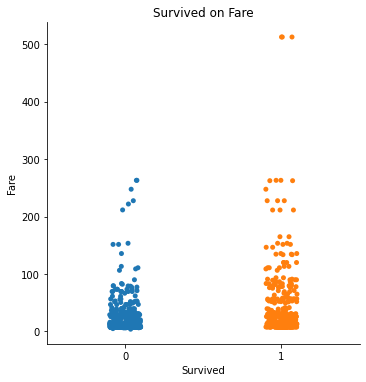

In [32]:
sns.catplot(data=titanic_train[['Survived', 'Fare']], x='Survived', y='Fare').set(title='Survived on Fare')

[Text(0.5, 1.0, 'Survival rate according to fare ranges and Pclass')]

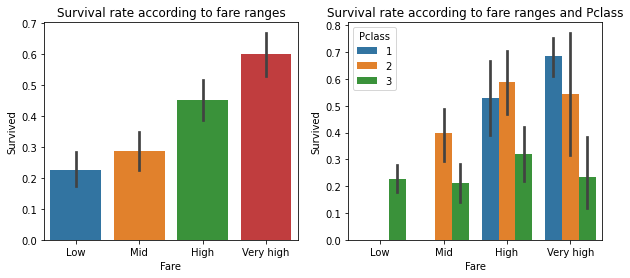

In [33]:
fare_ranges = pd.qcut(titanic_train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])

fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

sns.barplot(data=titanic_train[['Survived', 'Fare']], x=fare_ranges, y='Survived', ax=ax[0])
ax[0].set(title='Survival rate according to fare ranges')

sns.barplot(data=titanic_train[['Survived', 'Fare', 'Pclass']], x=fare_ranges, y='Survived', hue='Pclass', ax=ax[1])
ax[1].set(title='Survival rate according to fare ranges and Pclass')

[Text(0.5, 1.0, 'The relationship of Fare and Pclass')]

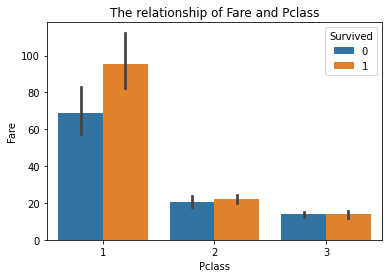

In [34]:
sns.barplot(data=titanic_train[['Survived', 'Fare', 'Pclass']], x='Pclass', y='Fare', hue='Survived').set(title='The relationship of Fare and Pclass')

# Sex

[Text(0.5, 1.0, 'Survivals by sex')]

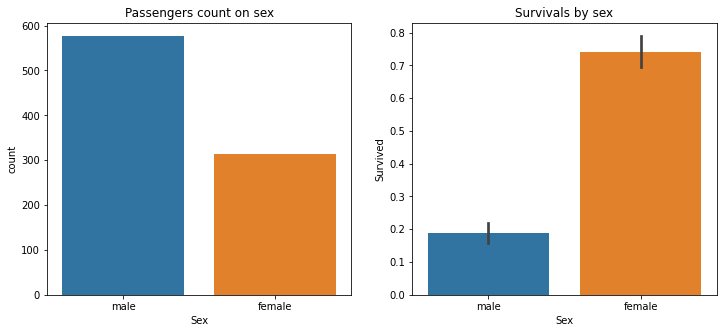

In [35]:
catData=titanic_train[['Survived', 'Sex']]
fig,ax = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=catData, x="Sex", ax=ax[0])
ax[0].set(xlabel='Sex', title='Passengers count on sex')

sns.barplot(data=catData, x="Sex", y="Survived", ax=ax[1])
ax[1].set(title='Survivals by sex')

# SibSp

* If there's SibSp, the possibility of survival increases compared to none, but even if a passenger has SibSp, survival rate decreases as the number of SibSp increases. 

-> Most of the passengers travled alone or with only one sibling or spouse

-> SibSp = 1 probably means a couple, so the rate of survival increases if SibSp =1.

-> It seems that it gets hard to rescue the member of the siblings if the number of their members increase.(As u can see from SibSp=5, 8 that has not survived at all.)

[Text(0.5, 1.0, 'Survived on SibSp'),
 Text(0.5, 0, 'SibSp'),
 Text(0, 0.5, 'Survived')]

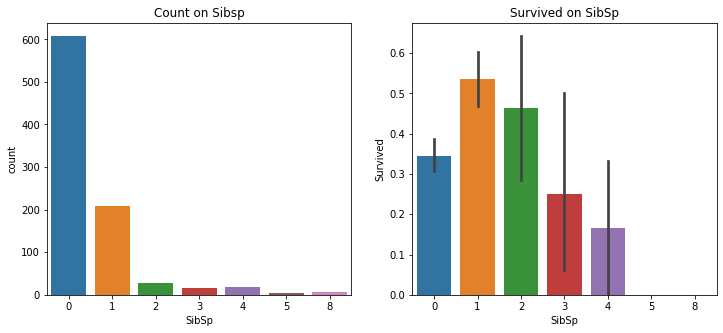

In [36]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train[['Survived', 'SibSp']], x='SibSp', ax=ax[0])
ax[0].set(title='Count on Sibsp', xlabel='SibSp', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'SibSp']], x='SibSp', y='Survived', ax=ax[1])
ax[1].set(title='Survived on SibSp', xlabel='SibSp', ylabel='Survived')

# Embarked

[Text(0.5, 1.0, 'Count on Embarked location according to Pclass'),
 Text(0.5, 0, 'Embarked'),
 Text(0, 0.5, 'Survived')]

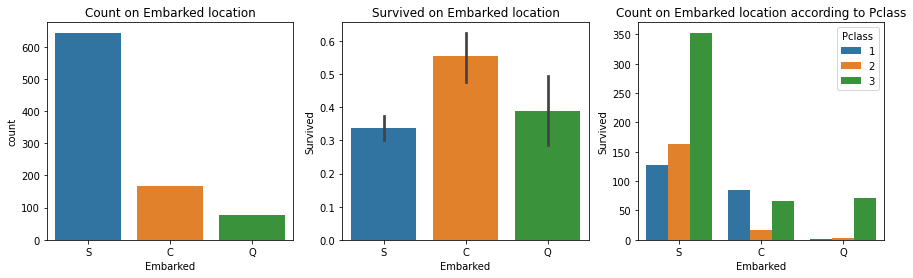

In [37]:
fig, ax=plt.subplots(ncols=3)
fig.set_size_inches(15, 4)

sns.countplot(data=titanic_train[['Survived', 'Embarked']], x='Embarked', ax=ax[0])
ax[0].set(title='Count on Embarked location', xlabel='Embarked', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Embarked']], x='Embarked', y='Survived', ax=ax[1])
ax[1].set(title='Survived on Embarked location', xlabel='Embarked', ylabel='Survived')

# The reason why C location boarded passengers survived a lot more than did in other two places
sns.countplot(data=titanic_train[['Survived', 'Pclass', 'Embarked']], x='Embarked', hue='Pclass', ax=ax[2])
ax[2].set(title='Count on Embarked location according to Pclass', xlabel='Embarked', ylabel='Survived')

# Parch

SibSp와 비슷한 경향을 보인다 : 즉, 4인 이상의 부모자녀가 여행할 경우 survival rate decreased but the chance of survival increased if they traveled alone or with small group of family.

[Text(0.5, 1.0, 'Survived on Parch'),
 Text(0.5, 0, 'Parch'),
 Text(0, 0.5, 'Survived')]

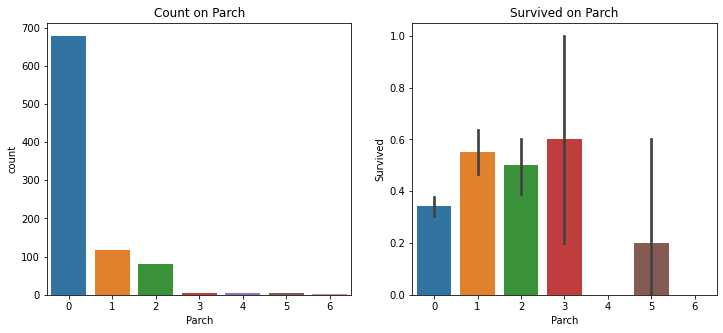

In [38]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train[['Survived', 'Parch']], x='Parch', ax=ax[0])
ax[0].set(title='Count on Parch', xlabel='Parch', ylabel='count')

sns.barplot(data=titanic_train[['Survived', 'Parch']], x='Parch', y='Survived', ax=ax[1])
ax[1].set(title='Survived on Parch', xlabel='Parch', ylabel='Survived')

## *Weak predictors into stronger ones by combining both SibSp and Parch*

Let's make them into 'FamSize' column 

In [39]:
titanic_train['FamSize']=titanic_train['SibSp']+titanic_train['Parch']+1
titanic_test['FamSize']=titanic_test['SibSp']+titanic_test['Parch']+1
# +1 because Parch '1' means 'I' have one more family other than myself.
# So, if Parch=0 and SibSp=0-> FamSize=1, Parch=1 and SibSp=1-> FamSize=3
# 하나의 행에는 한 승객의 부모자식 관계의 수, 형제자매배우자의 수가 나오기 때문에 이 두 열을 더하면 내 가족의 수가 되고 +1을 하면 해당 승객의 FamSize가 된다.

[Text(0.5, 1.0, 'Survived on FamSize'),
 Text(0.5, 0, 'FamSize'),
 Text(0, 0.5, 'Survived')]

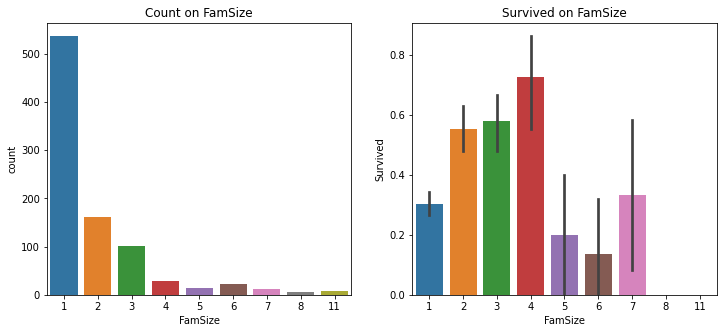

In [40]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train, x='FamSize', ax=ax[0])
ax[0].set(title='Count on FamSize', xlabel='FamSize', ylabel='count')

sns.barplot(data=titanic_train, x='FamSize', y='Survived', ax=ax[1])
ax[1].set(title='Survived on FamSize', xlabel='FamSize', ylabel='Survived')

In [41]:
titanic_train['FamType']=pd.cut(titanic_train.FamSize, [0, 1, 4, 7, 11], labels=['Solo', 'Small', 'Big', 'Very Big'])
titanic_test['FamType']=pd.cut(titanic_test.FamSize, [0, 1, 4, 7, 11], labels=['Solo', 'Small', 'Big', 'Very Big'])

[Text(0.5, 1.0, 'Survival rate on FamType'),
 Text(0.5, 0, 'FamType'),
 Text(0, 0.5, 'Survived')]

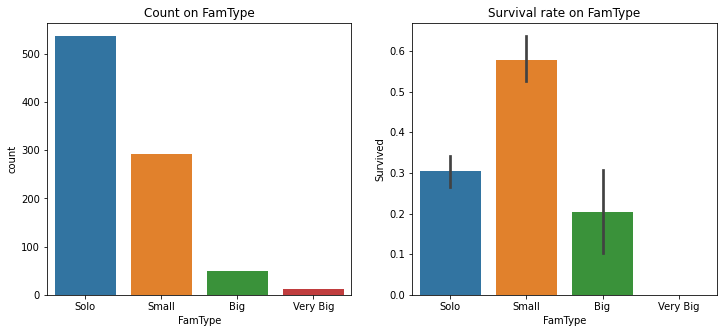

In [42]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.countplot(data=titanic_train, x='FamType', ax=ax[0])
ax[0].set(title='Count on FamType', xlabel='FamType', ylabel='count')

sns.barplot(data=titanic_train, x='FamType', y='Survived', ax=ax[1])
ax[1].set(title='Survival rate on FamType', xlabel='FamType', ylabel='Survived')

# Age

[Text(0.5, 1.0, 'Survived and dead count on age'), Text(0.5, 0, 'Age')]

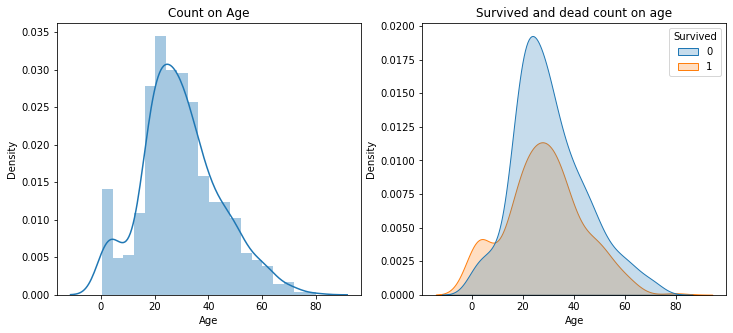

In [43]:
fig, ax=plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.distplot(titanic_train[['Age']],ax=ax[0])
ax[0].set(title='Count on Age', xlabel='Age')

sns.kdeplot(data=titanic_train[['Age', 'Survived']], x='Age', hue='Survived', shade=True, ax=ax[1])
ax[1].set(title='Survived and dead count on age', xlabel='Age')

#### Survived by age and sex

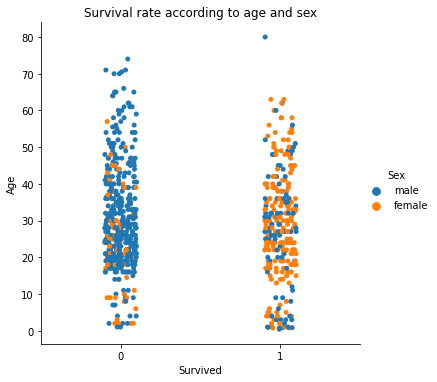

In [44]:
sns.catplot(data=titanic_train[['Age', 'Sex', 'Survived']], x='Survived', y='Age', hue='Sex').set(title='Survival rate according to age and sex', xlabel='Survived', ylabel='Age')

#### Survived by age, sex and Pclass 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Survival rate according to Pclass and Age'),
 Text(0.5, 0, 'Pclass'),
 Text(0, 0.5, 'Age')]

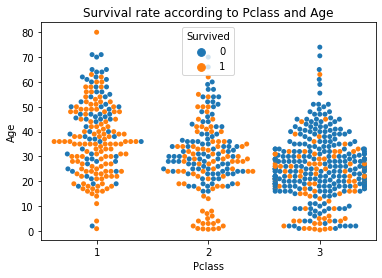

In [45]:
sns.swarmplot(data=titanic_train[['Age', 'Sex', 'Pclass', 'Survived']], x='Pclass', y='Age', hue='Survived').set(title='Survival rate according to Pclass and Age', xlabel='Pclass', ylabel='Age')

# Name

In [46]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,FamType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Solo


In [47]:
titanic_train['Title']=titanic_train.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())
titanic_test['Title']=titanic_test.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [48]:
titanic_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Jonkheer          1
Ms                1
the Countess      1
Sir               1
Don               1
Capt              1
Lady              1
Name: Title, dtype: int64

In [49]:
titanic_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [50]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,FamType,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Solo,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Small,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Solo,Mr


### *Substituting rare titles into female ones and male ones : 'Miss' and 'Mr'.*

In [51]:
# Female title
titanic_train.Title.replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
titanic_test.Title.replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

In [52]:
# Male title
titanic_train.Title.replace(['Major', 'Col', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Mr', inplace=True)
titanic_test.Title.replace(['Major', 'Col', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Mr', inplace=True)

In [53]:
titanic_train.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.160000
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

[Text(0.5, 1.0, 'Survival rate on Title'), Text(0.5, 0, 'Title')]

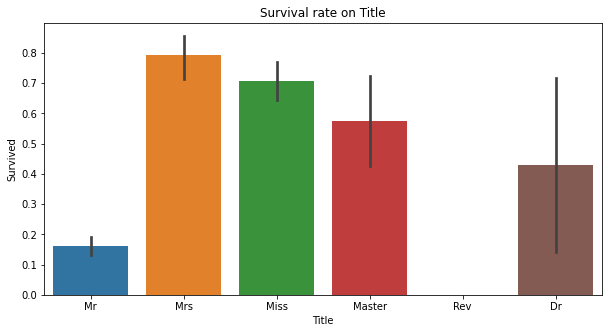

In [54]:
fig, ax=plt.subplots()
fig.set_size_inches(10, 5)

sns.barplot(data=titanic_train, x='Title', y='Survived', ax=ax).set(title='Survival rate on Title', xlabel='Title')

# Cabin and Tickets

Since cabin has so many missing values, it's not that useful. So we'll not use this column. 

But, we can use tickets column by creating two new columns throught it : One for first two letters of the ticket numbers and the other for the length of them

In [55]:
tickets=titanic_train.Ticket.unique()
print(tickets)
print(len(tickets))

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [56]:
# Extract the first two letters
titanic_train['Ticket_lett'] = titanic_train.Ticket.apply(lambda x: x[:2])
titanic_test['Ticket_lett'] = titanic_test.Ticket.apply(lambda x: x[:2])
# Calculate ticket length
titanic_train['Ticket_len'] = titanic_train.Ticket.apply(lambda x: len(x))
titanic_test['Ticket_len'] = titanic_test.Ticket.apply(lambda x: len(x))

-------------------

# Using Cabin feature

In [57]:
titanic_train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [58]:
print(titanic_train['Cabin'].isnull().sum())
print(titanic_test['Cabin'].isnull().sum())

687
327


Passengers without a cabin have a missing value displayed instead of cabin number. So we'll mark X if it's NaN and use only string part of the cabin

In [59]:
titanic_train['Cabin'][titanic_train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [60]:
titanic_test['Cabin'][titanic_test['Cabin'].notnull()].head()

12                B45
14                E31
24    B57 B59 B63 B66
26                B36
28                A21
Name: Cabin, dtype: object

In [61]:
# i[0] means the first alphabet of the string
# titanic_train['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'X' for i in titanic_train['Cabin']])
titanic_train.Cabin.apply(lambda x : x[0] if not pd.isnull(x) else 'X')

0      X
1      C
2      X
3      C
4      X
      ..
886    X
887    B
888    X
889    C
890    X
Name: Cabin, Length: 891, dtype: object

[Text(0.5, 1.0, 'Survival rate on Age'), Text(0.5, 0, 'Cabin')]

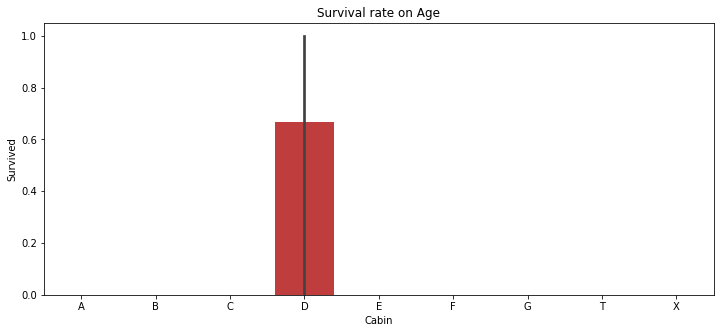

In [62]:
fig, ax=plt.subplots()
fig.set_size_inches(12, 5)

order=['A','B','C','D','E','F','G','T','X']

sns.barplot(data=titanic_train, x='Cabin', y='Survived', order=order, ax=ax)
ax.set(title='Survival rate on Age', xlabel='Cabin')

Without Cabin, survival rate decreases unlike the case of with Cabin. 

In the order of B ~ D ~ E > F >C 

In [63]:
titanic_train["Cabin"].head(3)

0    NaN
1    C85
2    NaN
Name: Cabin, dtype: object

# Modeling

### 1. Selecting features

1) 'Cabin' excluded : too many missing values

2) 'Age' and 'Sex' excluded : '다중 공선성(Multicollinearity)'에 의거 age와 sex 항은 제외한다. 왜냐하면 'Title'열에 이미 나이와 성별에 대한 정보가 들어 있기 때문이다. 가령 남자의 경우 Mr(old man), Master(young man)로 나이가 구분된다. 또한 남자는 Mr, master/ 여자는 Miss, Mrs인 점으로 성별 역시 알 수 있다.-> 하지만 구체적인 나이는 아닌데...흠..... Age를 썼을 때와 Title 열을 썼을 때의 성능 비교를 해볼 필요가 있을 것 같다.

In [64]:
y=titanic_train['Survived']
features=['Pclass', 'Fare', 'Title', 'Embarked', 'FamType', 'Ticket_len', 'Ticket_lett', 'Cabin']
X=titanic_train[features]
X.head(3)

,Pclass,Fare,Title,Embarked,FamType,Ticket_len,Ticket_lett,Cabin
0,3,7.2500,Mr,S,Small,9,A/,NaN
1,1,71.2833,Mrs,C,Small,8,PC,C85
2,3,7.9250,Miss,S,Solo,16,ST,NaN


In [65]:
len(y)

891

### 2. Import Modules for modeling

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [67]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'FamType', 'Ticket_len', 'Ticket_lett']

In [68]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# handle_unkown : Whether to raise an error or ignore if an unknown categorical feature is present during transform (default is to raise).

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.826


In [69]:
params={'model__n_estimators':[100, 500, 1000, 1500], 'model__max_depth':[3, 5, 7, 10, 15]}

In [70]:
titanic_grid=GridSearchCV(titanic_pipeline, param_grid=params, cv=5)

In [71]:
titanic_grid.fit(X, y)
print("최상의 교차 검증 정확도: {:.2f}".format(titanic_grid.best_score_))
print("테스트 점수: {:.2f}".format(titanic_grid.score(X, y)))
print("최적의 매개변수: ", titanic_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
titanic_pipeline.steps[1][1].feature_importances_

In [ ]:
feature_importance=pd.DataFrame({'features':})

## 이제 test data를 이용해 예측한다.

In [ ]:
X_test = titanic_test[features]
X_test.head(3)

In [ ]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

------------------

# Some practices...

In [ ]:
a=pd.DataFrame(titanic_train.columns)

a